# Earthquake dataset

**We will build a machine learning model to predict the magnitude of an earthquake**

#### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

#### Reading the dataset

In [2]:
df = pd.read_csv('/content/Earthquake.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head(7)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,1/2/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1/4/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,1/5/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,1/8/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,1/9/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
5,1/10/1965,13:36:32,-13.405,166.629,Earthquake,35.0,NaN,NaN,6.7,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860922,ISCGEM,ISCGEM,ISCGEM,Automatic
6,1/12/1965,13:32:25,27.357,87.867,Earthquake,20.0,NaN,NaN,5.9,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM861007,ISCGEM,ISCGEM,ISCGEM,Automatic


### Retrieving information about the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

The dataset has **9 categorical columns** and **12 numerical columns**. Some columns have missing values. The shape of the dataframe shows that there **23412 rows** in the dataset and **21 columns/features**

### Description of the dataset

In [6]:
df.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


The above results displays the description of the numeric columns in the dataset

In [7]:
df.shape

(23412, 21)

### Data Leakage

During the training phase, the ML model should know only about the training data. But if the model gets to know about the test data during the training phase, then this is called **data leakage**.

So we should perform splitting of the dataset before applying feature engineering. After splitting, we will first apply feature engineering for the training data and then apply it on to the test data. This will help to reduce data leakage and overfitting.

But presence of duplicates can also cause data leakage. Therefore, we will first remove the duplicate records from the dataset and then perform train test split

#### Now we will check for duplicates

In [8]:
df.duplicated().sum()

0

*There are no duplicate rows*

#### Splitting the dataset into training and testing datasets

In [9]:
X = df.drop(columns=["Magnitude"], axis=1)
Y = df.Magnitude

In [10]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42, shuffle=True)

Joining the training dataframe

In [11]:
df_train = X_train.join(y_train, how='inner')

Joining the testing dataframe

In [12]:
df_test = X_test.join(y_test, how='inner')

Resetting the indices for the training and test dataframes

In [13]:
df_train.reset_index(inplace = True, drop = True)

In [14]:
df_test.reset_index(inplace = True, drop = True)

The indices have been reset in the training and testing dataframes

## Data Preprocessing and cleaning in the training dataframe

Checking if there is any missing value in the training dataframe

In [15]:
df_train.isnull().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   15153
Depth Seismic Stations        13067
Magnitude Type                    2
Magnitude Error               18458
Magnitude Seismic Stations    16660
Azimuthal Gap                 12873
Horizontal Distance           17427
Horizontal Error              17786
Root Mean Square               4848
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
Magnitude                         0
dtype: int64

In [16]:
(df_train.isnull().sum()/len(df_train))

Date                          0.000000
Time                          0.000000
Latitude                      0.000000
Longitude                     0.000000
Type                          0.000000
Depth                         0.000000
Depth Error                   0.809066
Depth Seismic Stations        0.697688
Magnitude Type                0.000107
Magnitude Error               0.985530
Magnitude Seismic Stations    0.889530
Azimuthal Gap                 0.687330
Horizontal Distance           0.930482
Horizontal Error              0.949650
Root Mean Square              0.258850
ID                            0.000000
Source                        0.000000
Location Source               0.000000
Magnitude Source              0.000000
Status                        0.000000
Magnitude                     0.000000
dtype: float64

There are high number of **missing values** in the columns **Depth Error**, **Magnitude Error**, **Magnitude Seismic Stations**, **Horizontal Distance** and **Horizontal Error**. We can drop these columns as they have large number of missing values. 

For **Depth Seismic Stations**, **Azimuthal Gap** and **Root Mean Square** columns, we can impute the missing values with mean/median value depending upon the distribution.

For the column **Magnitude Type**, there are only 2 missing values. Thus we can drop the rows corresponding to these 2 missing values

In [17]:
for feature in df_train.columns:
  if (df_train[feature].isnull().sum()/len(df_train))*100 > 80:
    df_train = df_train.drop([feature], axis=1)
  elif (df_train[feature].isnull().sum()/len(df_train))*100 <= 1:
    df_train = df_train.dropna(subset=[feature])

In [18]:
df_train.isnull().sum()

Date                          0
Time                          0
Latitude                      0
Longitude                     0
Type                          0
Depth                         0
Depth Seismic Stations    13065
Magnitude Type                0
Azimuthal Gap             12871
Root Mean Square           4846
ID                            0
Source                        0
Location Source               0
Magnitude Source              0
Status                        0
Magnitude                     0
dtype: int64

#### Extracting the features having missing values which need to be imputed

In [19]:
NaN_features = [feature for feature in df_train.columns if (df_train[feature].count() < df_train.shape[0])]
NaN_features

['Depth Seismic Stations', 'Azimuthal Gap', 'Root Mean Square']

#### Plotting histogram and distplots for features need to be imputed

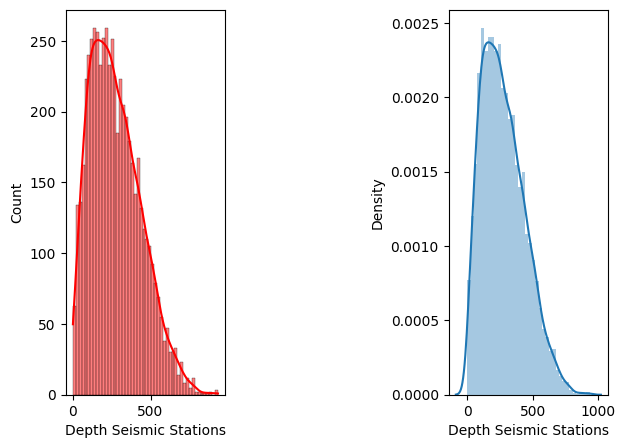

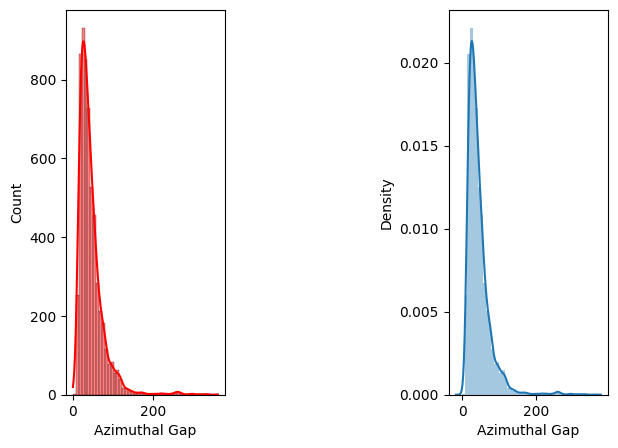

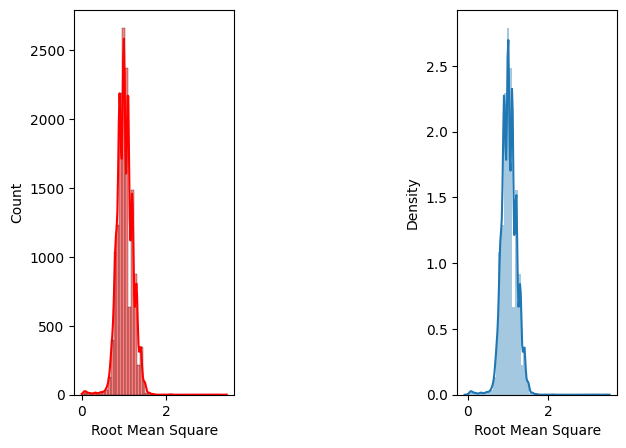

In [20]:
for feature in NaN_features:
    plt.figure(figsize=(7,5))
    plt.subplot(1,3,1)
    #sns.distplot(df_train[feature], color='red')
    sns.histplot(x = df_train[feature].dropna(), kde = True, color='red', bins=50)
    plt.subplot(1,3,3)
    #plt.hist(df_train[feature], bins=20)
    sns.distplot(df_train[feature])

It can be observed that the features plotted above are skewed. Thus, we can use respective **median** values to impute them

In [21]:
df_train['Depth Seismic Stations'] = df_train['Depth Seismic Stations'].fillna(df_train['Depth Seismic Stations'].median())

In [22]:
df_train['Azimuthal Gap'] = df_train['Azimuthal Gap'].fillna(df_train['Azimuthal Gap'].median())

In [23]:
df_train['Root Mean Square'] = df_train['Root Mean Square'].fillna(df_train['Root Mean Square'].median())

In [24]:
df_train.isnull().sum()

Date                      0
Time                      0
Latitude                  0
Longitude                 0
Type                      0
Depth                     0
Depth Seismic Stations    0
Magnitude Type            0
Azimuthal Gap             0
Root Mean Square          0
ID                        0
Source                    0
Location Source           0
Magnitude Source          0
Status                    0
Magnitude                 0
dtype: int64

There are no missing values anymore

#### Checking for unique values

In [25]:
df_train.nunique()

Date                      10989
Time                      16826
Latitude                  16935
Longitude                 17487
Type                          4
Depth                      3054
Depth Seismic Stations      717
Magnitude Type               10
Azimuthal Gap              1039
Root Mean Square            178
ID                        18727
Source                       12
Location Source              43
Magnitude Source             23
Status                        2
Magnitude                    60
dtype: int64

In [26]:
df_train.shape

(18727, 16)

*The **ID column** has all almost **unique values** and thus it does not contribute to determine the magnitude of the earthquake. So we can drop the ID column*

In [27]:
df_train = df_train.drop(['ID'], axis = 1)

In [28]:
df_train.shape

(18727, 15)

#### Extracting the continuous features from the training data

In [29]:
continuous_features = [feature for feature in df_train.select_dtypes(np.number).columns if feature not in ['Magnitude']]

In [30]:
continuous_features

['Latitude',
 'Longitude',
 'Depth',
 'Depth Seismic Stations',
 'Azimuthal Gap',
 'Root Mean Square']

#### Plotting Boxplot and Q-Q plot to identify Univariate outliers

In [31]:
import scipy.stats as stat
import pylab

In [32]:
def create_boxplots(dataset, feature_list):
    for feature in feature_list:
      plt.figure(figsize=(5,5))
      plt.ticklabel_format(style='plain')
      plt.suptitle("Boxplot and Q-Q plot of " + feature, fontweight="bold", fontsize=15)
      #dataset.boxplot(column=feature)
      plt.subplot(2,3,1)
      sns.boxplot(y=feature, data=dataset, color='orange')
      #plt.ylabel(feature)
      #plt.title(feature)
      plt.subplot(2,3,3)
      stat.probplot(dataset[feature], dist='norm', plot=pylab)
      plt.show()

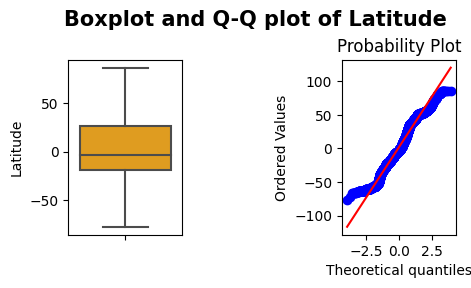

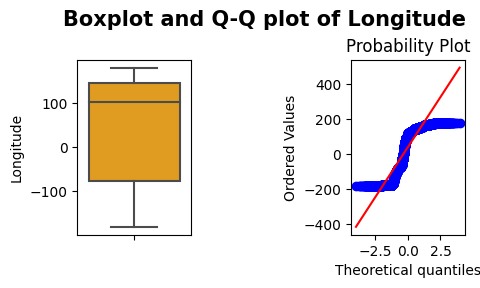

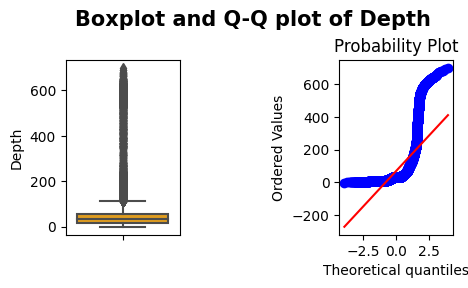

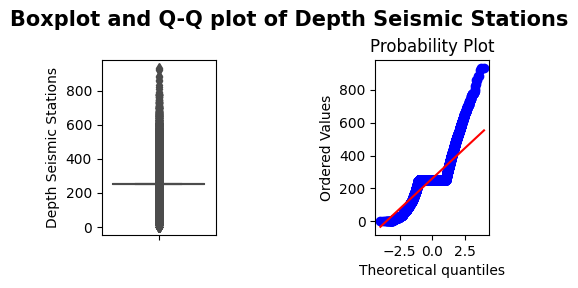

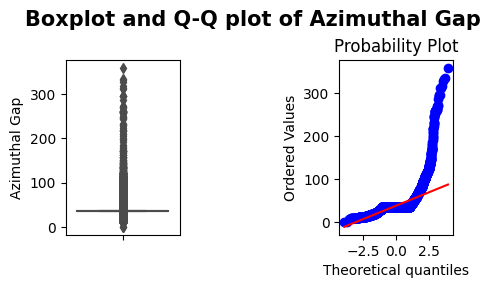

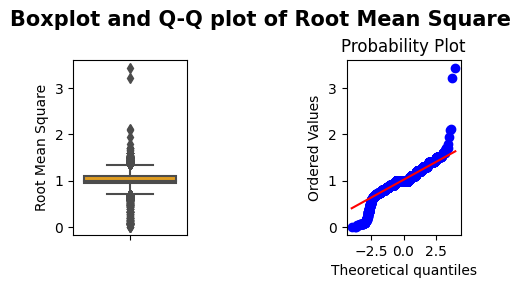

In [33]:
create_boxplots(df_train, continuous_features)

In [34]:
def remove_outliers(dataset, list_of_features):
    for feature in list_of_features:
        IQR = dataset[feature].quantile(0.75)-dataset[feature].quantile(0.25)
        lower_bridge = dataset[feature].quantile(0.25) - IQR*(1.5)
        #print(feature, lower_bridge)
        upper_bridge = dataset[feature].quantile(0.75) + IQR*(1.5)
        #print(feature, upper_bridge)
        #if lower_bridge != upper_bridge:
        dataset.loc[dataset[feature] >= upper_bridge, feature] = upper_bridge
        dataset.loc[dataset[feature] <= lower_bridge, feature] = lower_bridge

In [35]:
remove_outliers(df_train, continuous_features)

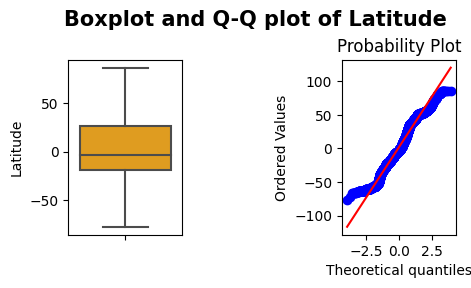

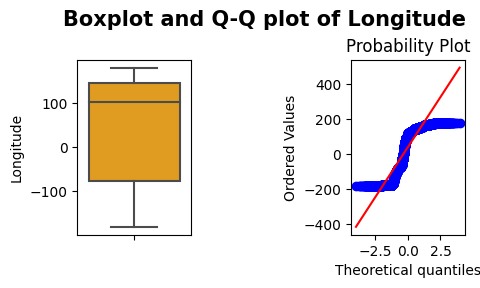

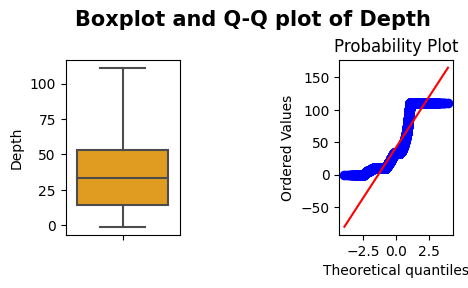

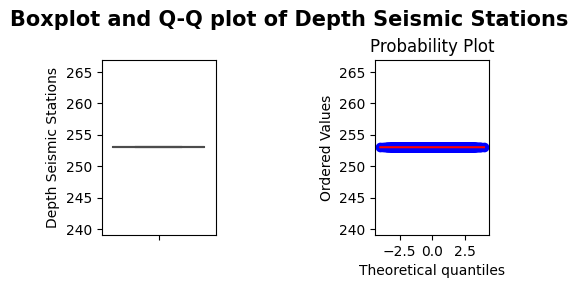

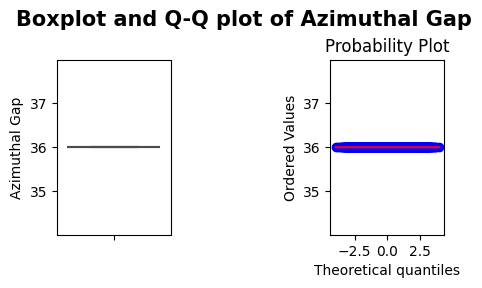

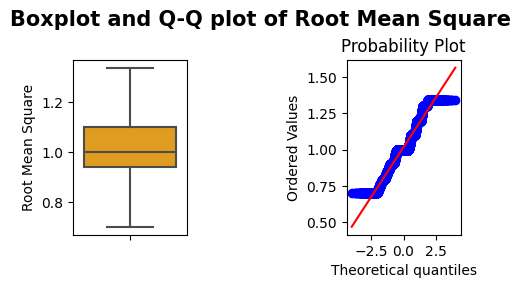

In [36]:
create_boxplots(df_train, continuous_features)

The univariate outliers have been treated

In [37]:
df_train.describe()

,Latitude,Longitude,Depth,Depth Seismic Stations,Azimuthal Gap,Root Mean Square,Magnitude
count,18727.000000,18727.000000,18727.000000,18727.0,18727.0,18727.000000,18727.000000
mean,1.766155,39.589574,42.135634,253.0,36.0,1.016695,5.881359
std,30.180708,125.377510,34.466601,0.0,0.0,0.142023,0.421455
min,-77.080000,-179.993000,-1.100000,253.0,36.0,0.700000,5.500000
25%,-18.676000,-76.314650,14.200000,253.0,36.0,0.940000,5.600000
50%,-3.508000,103.162000,33.000000,253.0,36.0,1.000000,5.700000
75%,26.570500,145.103500,53.000000,253.0,36.0,1.100000,6.000000
max,86.005000,179.998000,111.200000,253.0,36.0,1.340000,9.100000


In [38]:
df_train.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Seismic Stations,Magnitude Type,Azimuthal Gap,Root Mean Square,Source,Location Source,Magnitude Source,Status,Magnitude
0,11/29/2007,19:00:20,14.944,-61.274,Earthquake,111.2,253.0,MWB,36.0,0.74,US,US,US,Reviewed,7.4
1,10/28/2011,18:54:34,-14.438,-75.966,Earthquake,24.0,253.0,MWW,36.0,1.00,US,US,US,Reviewed,6.9
2,3/25/2007,13:57:58,38.340,20.420,Earthquake,15.0,253.0,MWB,36.0,1.00,US,ATH,US,Reviewed,5.7
3,5/6/2004,13:43:13,42.525,145.021,Earthquake,28.6,253.0,MWB,36.0,0.80,US,US,US,Reviewed,5.5
4,8/27/1988,16:30:17,-15.864,-172.067,Earthquake,27.9,253.0,MW,36.0,0.90,US,US,HRV,Reviewed,5.7


#### Plotting histograms and distplots to check the distributions of continuous variables

In [39]:
def create_histograms_distplots(dataset, feature_list):
    for feature in feature_list:
        plt.figure(figsize=(10,10))
        plt.suptitle("Histogram and Q-Q plot of variable " + feature, fontweight="bold", fontsize=15)
        plt.subplot(3,5,1)
        plt.ticklabel_format(style='plain')
        #plt.hist(dataset[feature].dropna())
        sns.histplot(x = dataset[feature].dropna(), kde = True)
        plt.title(feature)
        plt.subplot(3,5,3)
        plt.ticklabel_format(style='plain')
        sns.distplot(dataset[feature])
        plt.ylabel('Count/Frequency')
        plt.subplot(3,5,5)
        stat.probplot(dataset[feature], dist='norm', plot=pylab)
        plt.show()

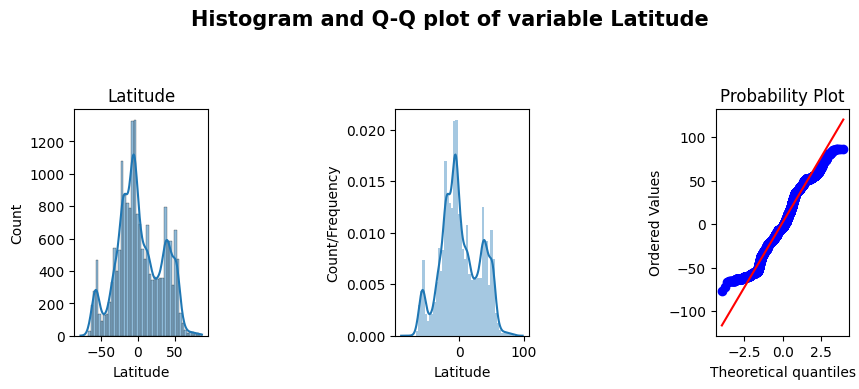

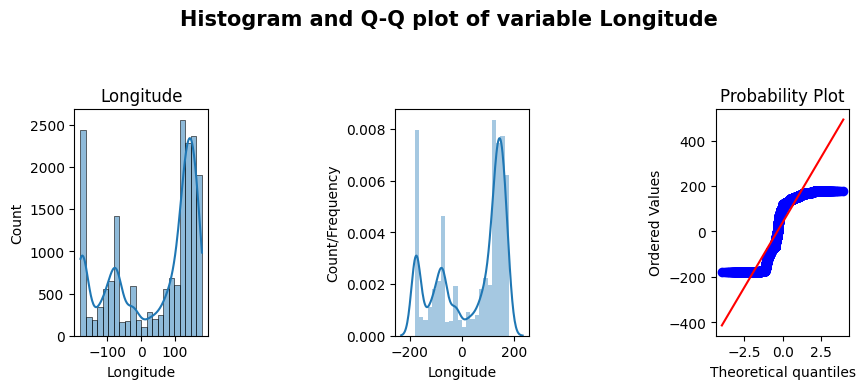

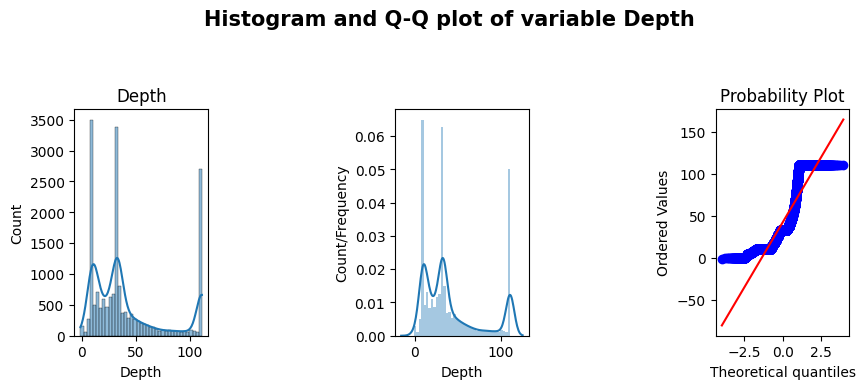

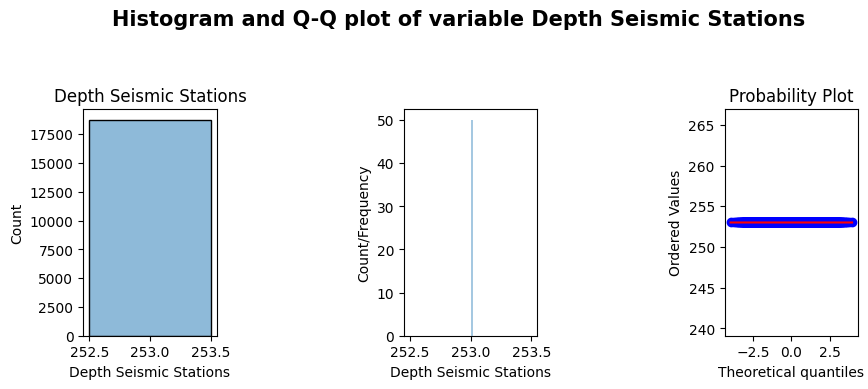

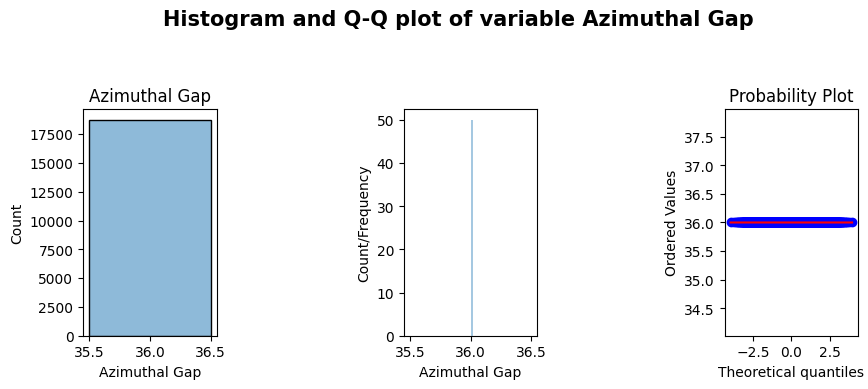

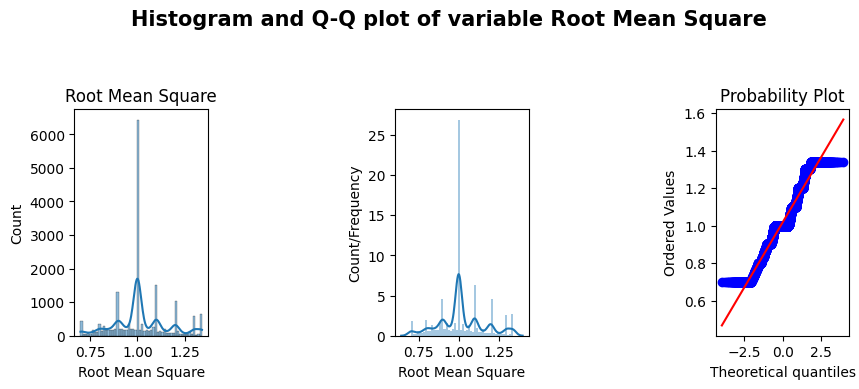

In [40]:
create_histograms_distplots(df_train, continuous_features)

#### Performing transformation to remove skeweness

In [41]:
from scipy.stats import skew

In [42]:
def skewness_score(dataset, feature_list):
    variables = []
    skew_scores = []
    square_root_transformed_skew_scores = []
    log_transformed_skew_scores = []
    exp_transformed_skew_scores = []
    #boxcox_transformed_skew_scores = []
    for feature in feature_list:
      column_name_square_root = ''
      column_name_log = ''
      variables.append(feature)
      skew_scores.append(skew(dataset[feature]))
      if (float(skew(dataset[feature])) >= 0.5) | (float(skew(dataset[feature])) <= -0.5):
        if dataset[feature].min() > 0:
          column_name_square_root = f'{str(feature)} square root transformed'
          dataset[column_name_square_root] = np.sqrt(dataset[feature])
          column_name_log = f'{str(feature)} log transformed'
          dataset[column_name_log] = np.log(dataset[feature])
          square_root_transformed_skew_scores.append(skew(dataset[column_name_square_root]))
          log_transformed_skew_scores.append(skew(dataset[column_name_log]))
        else:
          square_root_transformed_skew_scores.append('Not transformed')
          log_transformed_skew_scores.append('Not transformed')
        #column_name_exp = f'{str(feature)} exp transformed'
        dataset[feature] = np.exp(dataset[feature])
        exp_transformed_skew_scores.append(skew(dataset[feature]))
        #boxcox_transformed_skew_scores.append(skew(dataset[column_name_exp]))
      else:
        exp_transformed_skew_scores.append('Not transformed')
        #boxcox_transformed_skew_scores.append('Not transformed')
      #skew_dict = {'Feature': variables, 'Skewness Score before transformation': skew_scores, 'Skewness score after square root transformation of skewed features': square_root_transformed_skew_scores, 'Skewness score after log transformation of skewed features': log_transformed_skew_scores, 'Skewness score after exponential transformation of skewed features': exp_transformed_skew_scores, 'Skewness score after boxcox transformation of skewed features': boxcox_transformed_skew_scores}
      #skew_dict = {'Feature': variables, 'Skewness Score before transformation': skew_scores, 'Skewness score after square root transformation of skewed features': square_root_transformed_skew_scores, 'Skewness score after log transformation of skewed features': log_transformed_skew_scores, 'Skewness score after exponential transformation of skewed features': exp_transformed_skew_scores}
      skew_dict = {'Feature': variables, 'Skewness Score before transformation': skew_scores, 'Skewness score after exponential transformation of skewed features': exp_transformed_skew_scores}
      skewness_score = pd.DataFrame(skew_dict)
    return skewness_score

In [43]:
skewness_score(df_train, continuous_features)

,Feature,Skewness Score before transformation,Skewness score after exponential transformation of skewed features
0,Latitude,0.093417,Not transformed
1,Longitude,-0.598407,11.015077
2,Depth,1.064064,2.065203
3,Depth Seismic Stations,NaN,Not transformed
4,Azimuthal Gap,NaN,Not transformed
5,Root Mean Square,0.257024,Not transformed


In [44]:
df_train.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Seismic Stations,Magnitude Type,Azimuthal Gap,Root Mean Square,Source,Location Source,Magnitude Source,Status,Magnitude
0,11/29/2007,19:00:20,14.944,2.449288e-27,Earthquake,1.965832e+48,253.0,MWB,36.0,0.74,US,US,US,Reviewed,7.4
1,10/28/2011,18:54:34,-14.438,1.019496e-33,Earthquake,2.648912e+10,253.0,MWW,36.0,1.00,US,US,US,Reviewed,6.9
2,3/25/2007,13:57:58,38.340,7.384028e+08,Earthquake,3.269017e+06,253.0,MWB,36.0,1.00,US,ATH,US,Reviewed,5.7
3,5/6/2004,13:43:13,42.525,9.590032e+62,Earthquake,2.635252e+12,253.0,MWB,36.0,0.80,US,US,US,Reviewed,5.5
4,8/27/1988,16:30:17,-15.864,1.871765e-75,Earthquake,1.308628e+12,253.0,MW,36.0,0.90,US,US,HRV,Reviewed,5.7


In [45]:
df_train.describe()

,Latitude,Longitude,Depth,Depth Seismic Stations,Azimuthal Gap,Root Mean Square,Magnitude
count,18727.000000,1.872700e+04,1.872700e+04,18727.0,18727.0,18727.000000,18727.000000
mean,1.766155,1.035266e+76,2.773397e+47,253.0,36.0,1.016695,5.881359
std,30.180708,9.424890e+76,6.818258e+47,0.0,0.0,0.142023,0.421455
min,-77.080000,6.761348e-79,3.328711e-01,253.0,36.0,0.700000,5.500000
25%,-18.676000,7.194010e-34,1.468864e+06,253.0,36.0,0.940000,5.600000
50%,-3.508000,6.348737e+44,2.146436e+14,253.0,36.0,1.000000,5.700000
75%,26.570500,1.041514e+63,1.041376e+23,253.0,36.0,1.100000,6.000000
max,86.005000,1.486408e+78,1.965832e+48,253.0,36.0,1.340000,9.100000


We can observe that the skewed features have been transformed

#### Now we will perform bivariate analysis by plotting relplot

In [46]:
def create_relplot(dataset, list_of_features, target):
    for feature in list_of_features:
        for bivariate_feature in list_of_features:
            if bivariate_feature != feature:
                plt.figure(figsize=(7,7))
                sns.relplot(x=feature, y=bivariate_feature, data=dataset, hue=target)
                plt.show()

<Figure size 700x700 with 0 Axes>

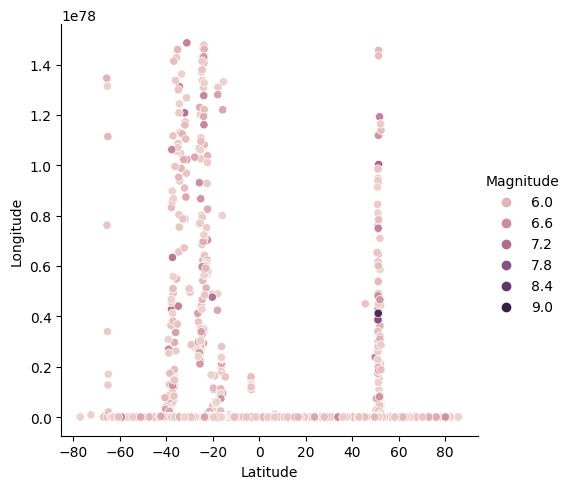

<Figure size 700x700 with 0 Axes>

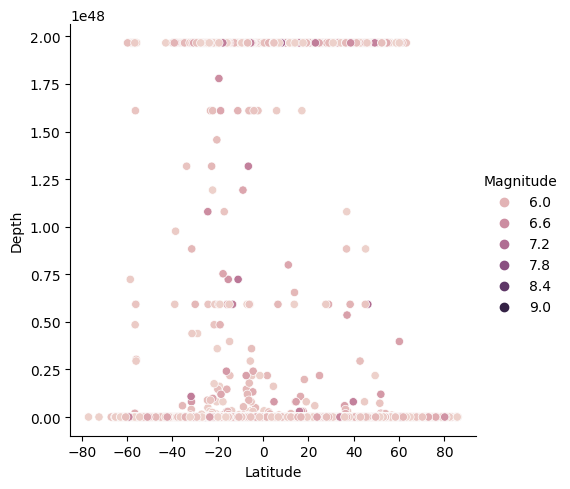

<Figure size 700x700 with 0 Axes>

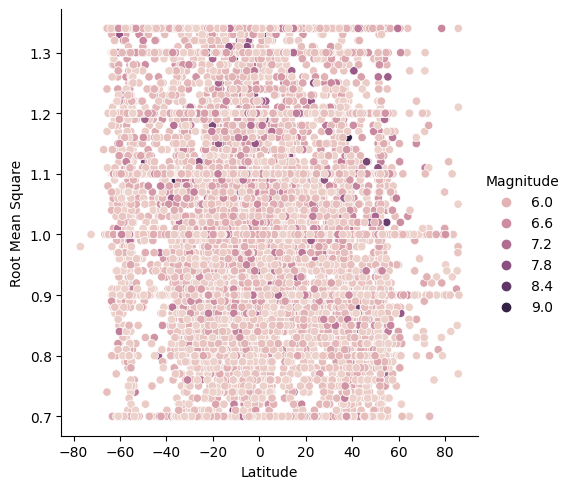

<Figure size 700x700 with 0 Axes>

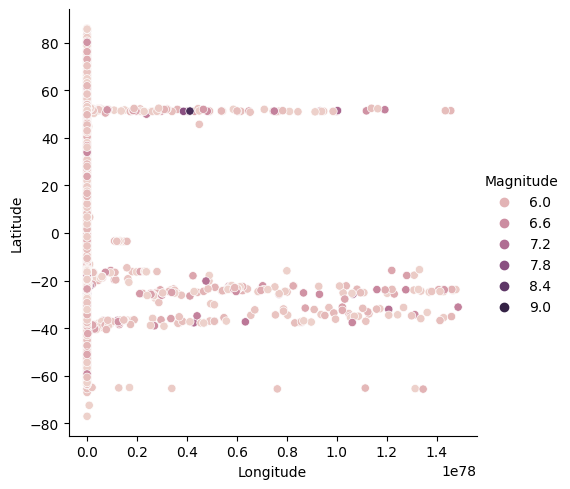

<Figure size 700x700 with 0 Axes>

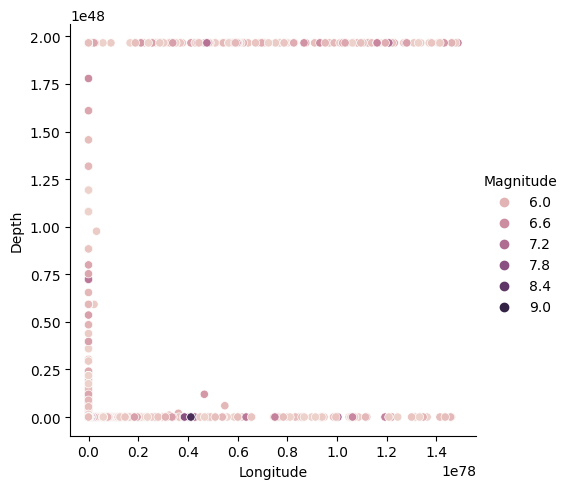

<Figure size 700x700 with 0 Axes>

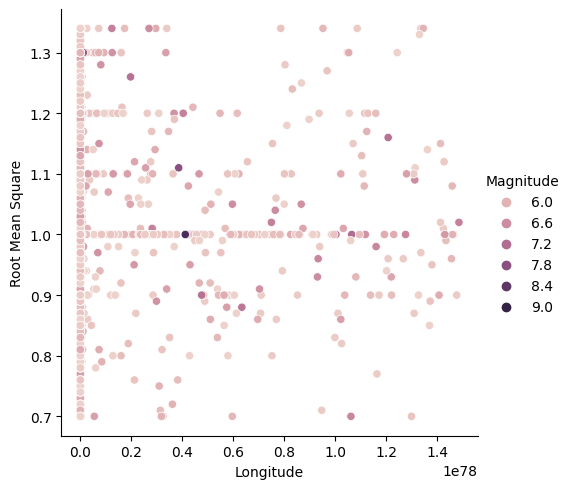

<Figure size 700x700 with 0 Axes>

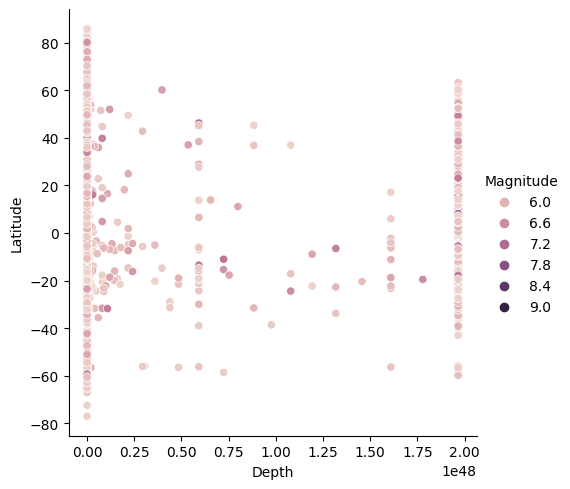

<Figure size 700x700 with 0 Axes>

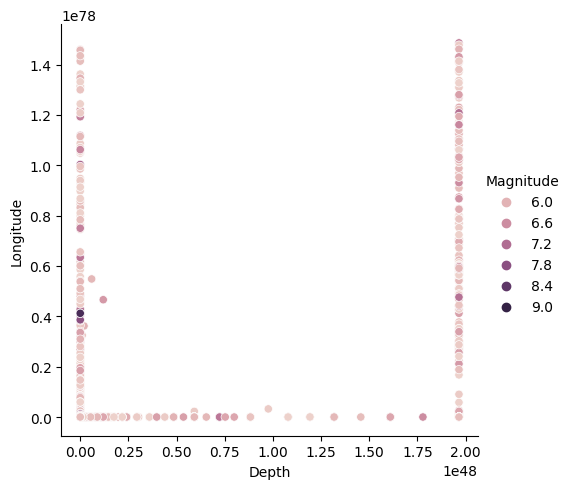

<Figure size 700x700 with 0 Axes>

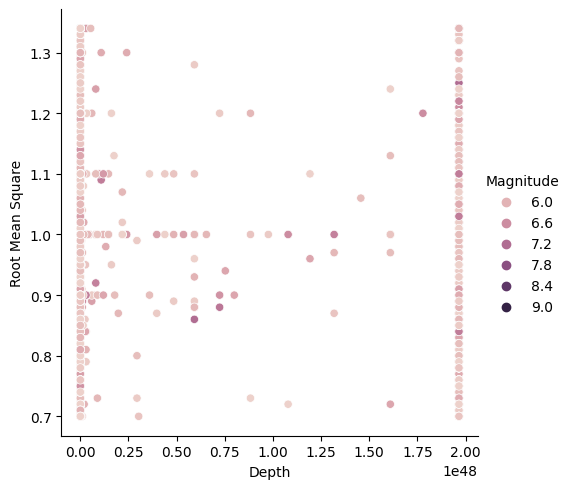

<Figure size 700x700 with 0 Axes>

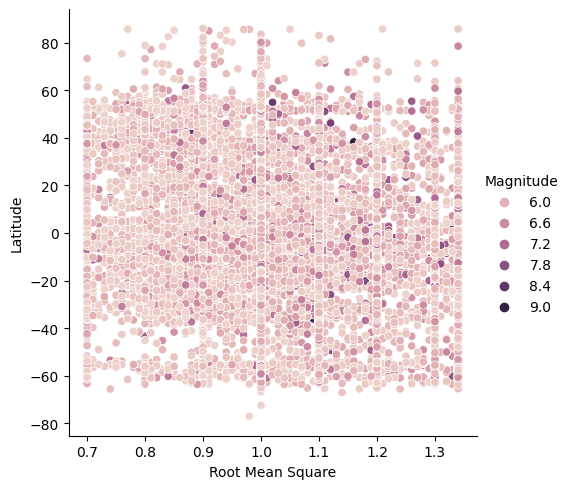

<Figure size 700x700 with 0 Axes>

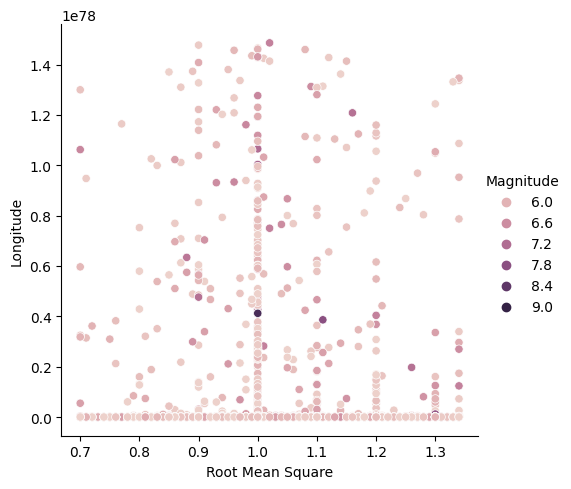

<Figure size 700x700 with 0 Axes>

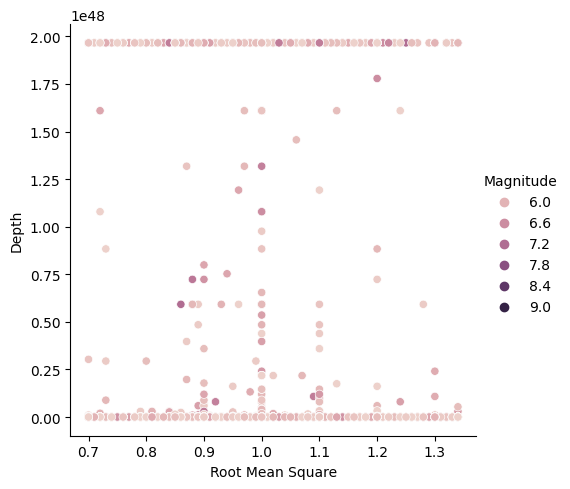

In [47]:
create_relplot(df_train, ['Latitude', 'Longitude', 'Depth', 'Root Mean Square'], 'Magnitude')

#### Plotting FacetGrids

In [48]:
def create_FacetGrid(dataset, feature_list):
    for feature in feature_list:
        v = sns.FacetGrid(dataset, col='Magnitude Source', row='Location Source')
        v.map(plt.hist, feature)

In [49]:
#create_FacetGrid(df_train, ['Latitude', 'Longitude', 'Depth', 'Root Mean Square'])

Processing the **Date** variable

In [50]:
df_train[df_train['Date'] == '1985-04-28T02:53:41.530Z']

,Date,Time,Latitude,Longitude,Type,Depth,Depth Seismic Stations,Magnitude Type,Azimuthal Gap,Root Mean Square,Source,Location Source,Magnitude Source,Status,Magnitude
7746,1985-04-28T02:53:41.530Z,1985-04-28T02:53:41.530Z,-32.998,6.798643e-32,Earthquake,2.146436e+14,253.0,MW,36.0,1.3,US,US,HRV,Reviewed,5.6


In [51]:
df_train[df_train['Date'] == '1975-02-23T02:58:41.000Z']

,Date,Time,Latitude,Longitude,Type,Depth,Depth Seismic Stations,Magnitude Type,Azimuthal Gap,Root Mean Square,Source,Location Source,Magnitude Source,Status,Magnitude
7708,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,7.675167e+53,Earthquake,1.965832e+48,253.0,MB,36.0,1.0,US,US,US,Reviewed,5.6


It can be seen that there are some **Date** values that require processing/cleaning

#### Importing Regular Expression library

In [52]:
import re

In [53]:
df_train['Date'] = [re.sub('T02:[0-9]+:[0-9]+.[0-9]+Z', '', e) for e in df_train['Date']]
df_train['Date'] = [re.sub('-', '/', e) for e in df_train['Date']]

In [54]:
for e in df_train['Date']:
  l = []
  matcher = re.finditer('\d{4}/\d{2}', e)
  for m in matcher:
    l = e.split('/')
    df_train['Date'][df_train['Date'] == e] = f'{l[1]}/{l[2]}/{l[0]}'

In [55]:
df_train['Day'] = pd.to_datetime(df_train.Date, format="%m/%d/%Y").dt.day

In [56]:
df_train['Month'] = pd.to_datetime(df_train.Date, format="%m/%d/%Y").dt.month

In [57]:
df_train['Year'] = pd.to_datetime(df_train.Date, format="%m/%d/%Y").dt.year

In [58]:
df_train.drop(['Date'], axis=1, inplace=True)

Processing the **Time** variable

In [59]:
df_train[df_train['Time'] == '1985-04-28T02:53:41.530Z']

,Time,Latitude,Longitude,Type,Depth,Depth Seismic Stations,Magnitude Type,Azimuthal Gap,Root Mean Square,Source,Location Source,Magnitude Source,Status,Magnitude,Day,Month,Year
7746,1985-04-28T02:53:41.530Z,-32.998,6.798643e-32,Earthquake,2.146436e+14,253.0,MW,36.0,1.3,US,US,HRV,Reviewed,5.6,28,4,1985


In [60]:
df_train[df_train['Time'] == '1975-02-23T02:58:41.000Z']

,Time,Latitude,Longitude,Type,Depth,Depth Seismic Stations,Magnitude Type,Azimuthal Gap,Root Mean Square,Source,Location Source,Magnitude Source,Status,Magnitude,Day,Month,Year
7708,1975-02-23T02:58:41.000Z,8.017,7.675167e+53,Earthquake,1.965832e+48,253.0,MB,36.0,1.0,US,US,US,Reviewed,5.6,23,2,1975


In [61]:
df_train['Time'] = [re.sub('[0-9]+-[0-9]+-[0-9]+T', '', e) for e in df_train['Time']]

In [62]:
df_train['Time'] = [re.sub('[.][0-9]+Z', '', e) for e in df_train['Time']]

In [63]:
df_train['Hours'] = pd.to_datetime(df_train['Time'], utc=True).dt.hour

In [64]:
df_train['Minutes'] = pd.to_datetime(df_train['Time'], utc=True).dt.minute

In [65]:
df_train['Seconds'] = pd.to_datetime(df_train['Time'], utc=True).dt.second

In [66]:
df_train.drop(['Time'], axis=1, inplace=True)

In [67]:
df_train.head()

,Latitude,Longitude,Type,Depth,Depth Seismic Stations,Magnitude Type,Azimuthal Gap,Root Mean Square,Source,Location Source,Magnitude Source,Status,Magnitude,Day,Month,Year,Hours,Minutes,Seconds
0,14.944,2.449288e-27,Earthquake,1.965832e+48,253.0,MWB,36.0,0.74,US,US,US,Reviewed,7.4,29,11,2007,19,0,20
1,-14.438,1.019496e-33,Earthquake,2.648912e+10,253.0,MWW,36.0,1.00,US,US,US,Reviewed,6.9,28,10,2011,18,54,34
2,38.340,7.384028e+08,Earthquake,3.269017e+06,253.0,MWB,36.0,1.00,US,ATH,US,Reviewed,5.7,25,3,2007,13,57,58
3,42.525,9.590032e+62,Earthquake,2.635252e+12,253.0,MWB,36.0,0.80,US,US,US,Reviewed,5.5,6,5,2004,13,43,13
4,-15.864,1.871765e-75,Earthquake,1.308628e+12,253.0,MW,36.0,0.90,US,US,HRV,Reviewed,5.7,27,8,1988,16,30,17


In [68]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18727 entries, 0 to 18728
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Latitude                18727 non-null  float64
 1   Longitude               18727 non-null  float64
 2   Type                    18727 non-null  object 
 3   Depth                   18727 non-null  float64
 4   Depth Seismic Stations  18727 non-null  float64
 5   Magnitude Type          18727 non-null  object 
 6   Azimuthal Gap           18727 non-null  float64
 7   Root Mean Square        18727 non-null  float64
 8   Source                  18727 non-null  object 
 9   Location Source         18727 non-null  object 
 10  Magnitude Source        18727 non-null  object 
 11  Status                  18727 non-null  object 
 12  Magnitude               18727 non-null  float64
 13  Day                     18727 non-null  int64  
 14  Month                   18727 non-null

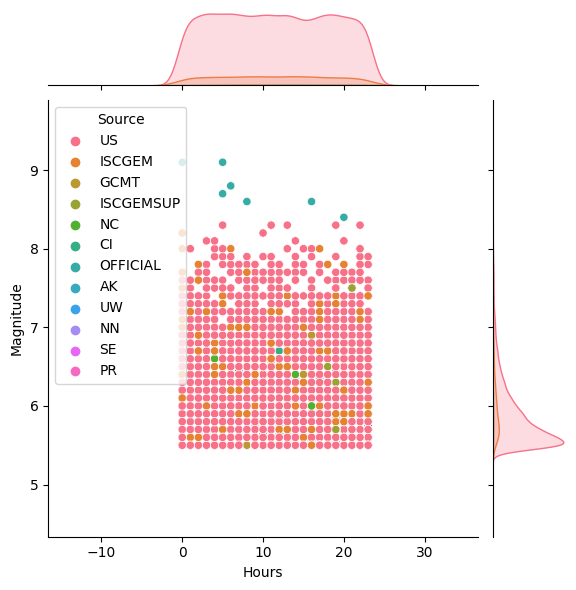

In [69]:
sns.jointplot(y='Magnitude', x='Hours', data=df_train, hue='Source')

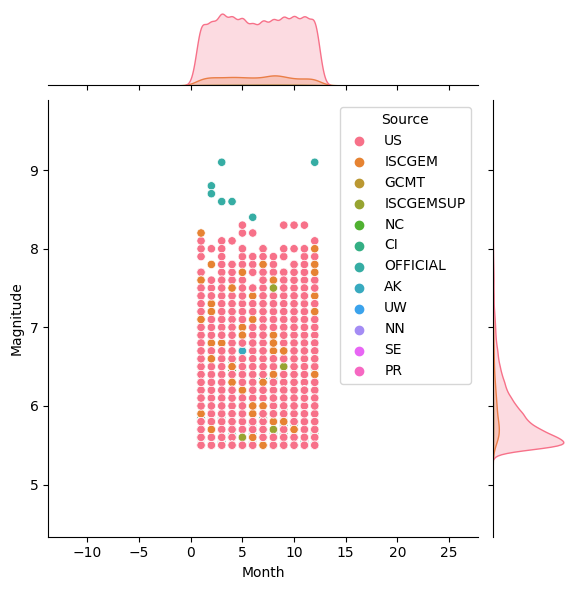

In [70]:
sns.jointplot(y='Magnitude', x='Month', data=df_train, hue='Source')

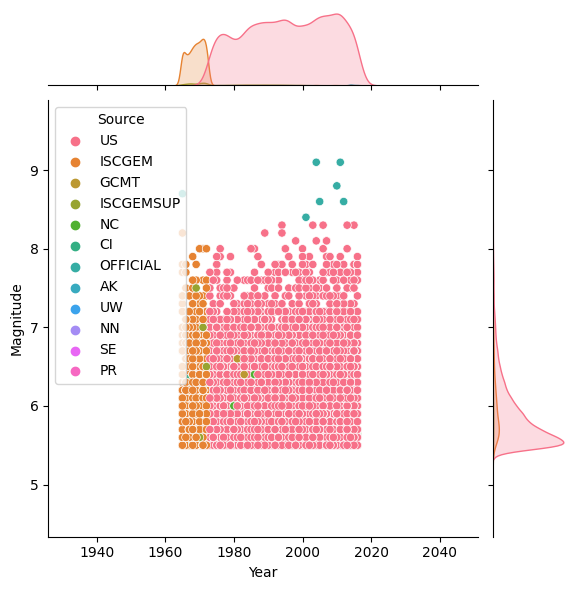

In [71]:
sns.jointplot(y='Magnitude', x='Year', data=df_train, hue='Source')

In [72]:
categorical_features = [feature for feature in df_train.select_dtypes(np.object).columns]

In [73]:
categorical_features

['Type',
 'Magnitude Type',
 'Source',
 'Location Source',
 'Magnitude Source',
 'Status']

In [74]:
df_train[categorical_features].nunique()

Type                 4
Magnitude Type      10
Source              12
Location Source     43
Magnitude Source    23
Status               2
dtype: int64

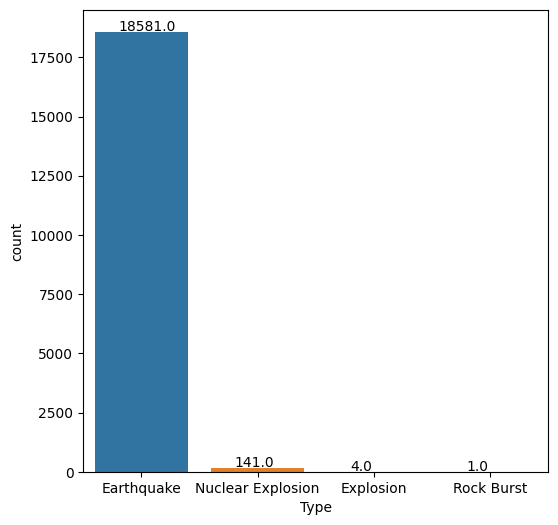

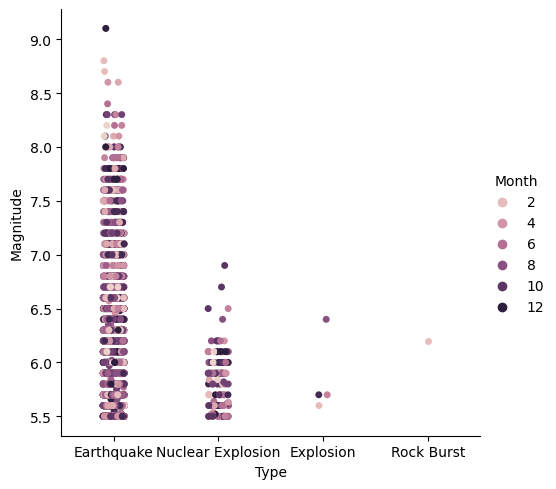

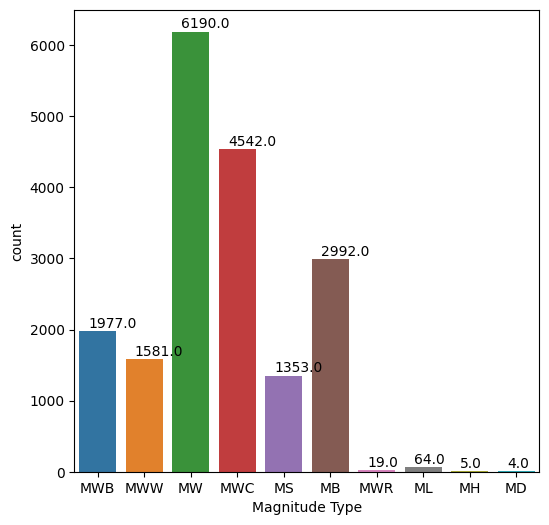

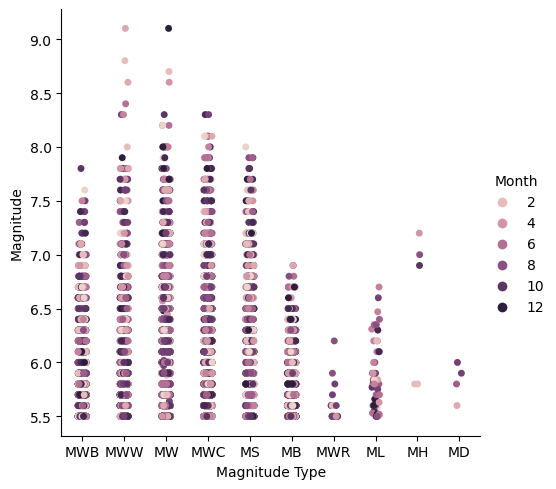

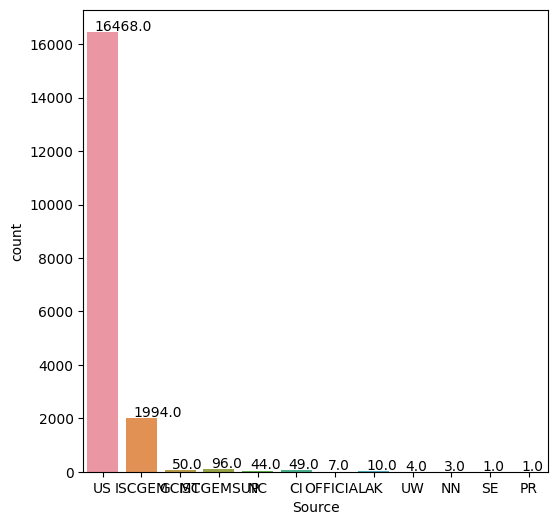

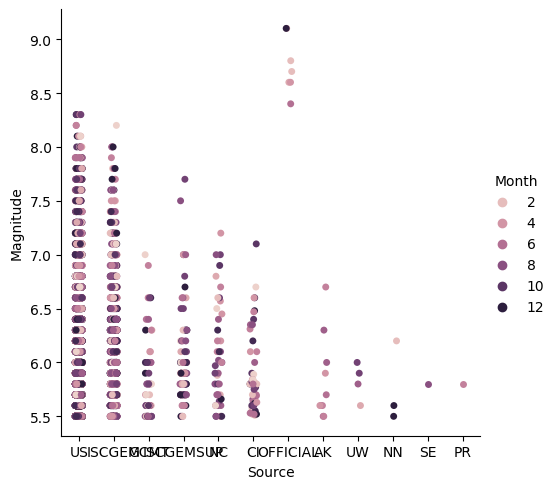

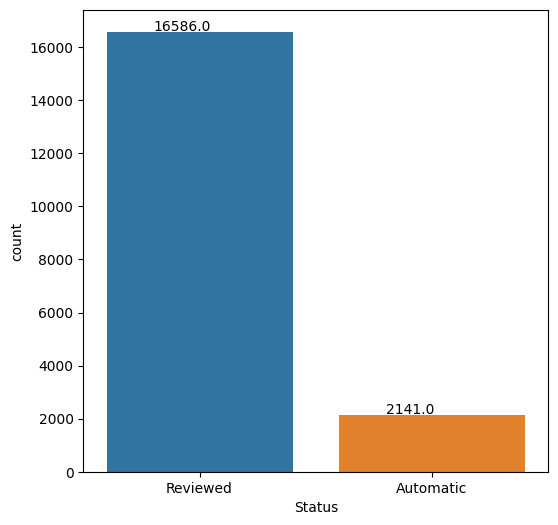

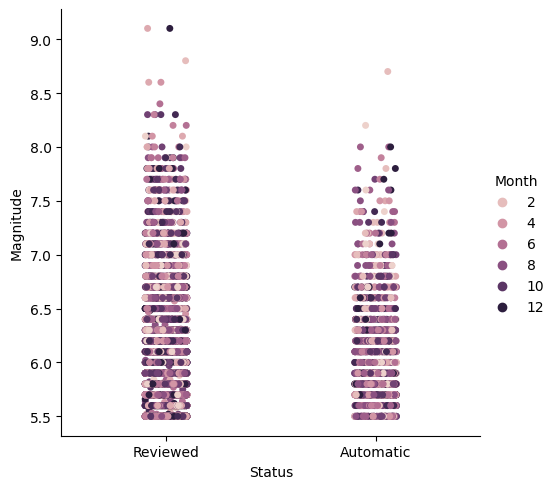

In [75]:
for feature in categorical_features:
    #print('Unique categories in the feature', feature, ': ', df_train[feature].nunique(), 'labels')
    if df_train[feature].nunique() <= 12:
      #print(df_train[feature].value_counts())
      plt.figure(figsize=(6,6))
      ax = sns.countplot(x=feature, data=df_train)
      for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+50))
      sns.catplot(x=feature, y='Magnitude', data=df_train, hue='Month')
      plt.show()

*From the plots, we can observe that most of the earthquakes are genuine earthquakes whereas very few earthquakes are due to explosions and rock burst. The magnitude of earthquake ranges from 5.5 to approx 9 for genuine earthquakes whereas the magnitude varies from 5.5 to 7 in the case of explosions*

In [76]:
df_train = df_train.drop(['Source', 'Magnitude Source'], axis=1)

In [77]:
categorical_features.remove('Source')

In [78]:
categorical_features.remove('Magnitude Source')

In [79]:
categorical_features

['Type', 'Magnitude Type', 'Location Source', 'Status']

In [80]:
pd.pivot_table(df_train, index='Type', values=continuous_features, aggfunc=['median'])

median                                                \
                  Azimuthal Gap         Depth Depth Seismic Stations Latitude   
Type                                                                            
Earthquake                 36.0  2.146436e+14                  253.0   -3.591   
Explosion                  36.0  1.000000e+00                  253.0   14.006   
Nuclear Explosion          36.0  1.000000e+00                  253.0   49.891   
Rock Burst                 36.0  2.718282e+00                  253.0  -47.911   

                                                  
                      Longitude Root Mean Square  
Type                                              
Earthquake         4.202463e+45             1.00  
Explosion          2.686920e+23             0.90  
Nuclear Explosion  1.653852e+34             0.90  
Rock Burst         1.789330e+43             1.14

In [81]:
pd.pivot_table(df_train, index='Magnitude Type', values=continuous_features, aggfunc='median')

,Azimuthal Gap,Depth,Depth Seismic Stations,Latitude,Longitude,Root Mean Square
Magnitude Type,,,,,,
MB,36.0,2.146436e+14,253.0,-4.280000,2.355036e+53,1.00
MD,36.0,1.639167e+08,253.0,43.696333,7.723581e-54,0.70
MH,36.0,4.034288e+02,253.0,37.036167,1.170202e-53,0.70
ML,36.0,8.521810e+02,253.0,37.453500,3.273860e-52,0.70
MS,36.0,2.146436e+14,253.0,-3.684000,3.298362e+42,1.00
MW,36.0,2.146436e+14,253.0,-1.733500,5.366467e+50,1.00
MWB,36.0,1.068647e+13,253.0,-3.100000,3.316836e+41,0.98
MWC,36.0,2.146436e+14,253.0,-4.511000,1.558064e+42,1.00
MWR,36.0,2.202647e+04,253.0,14.684000,5.488873e-32,0.94


In [82]:
pd.pivot_table(df_train, index='Status', values=continuous_features, aggfunc='median')

,Azimuthal Gap,Depth,Depth Seismic Stations,Latitude,Longitude,Root Mean Square
Status,,,,,,
Automatic,36.0,2.378319e+13,253.0,6.6000,9.805957e+53,1.0
Reviewed,36.0,2.146436e+14,253.0,-4.1685,5.003839e+43,1.0


<Axes: xlabel='Type,Magnitude Type'>

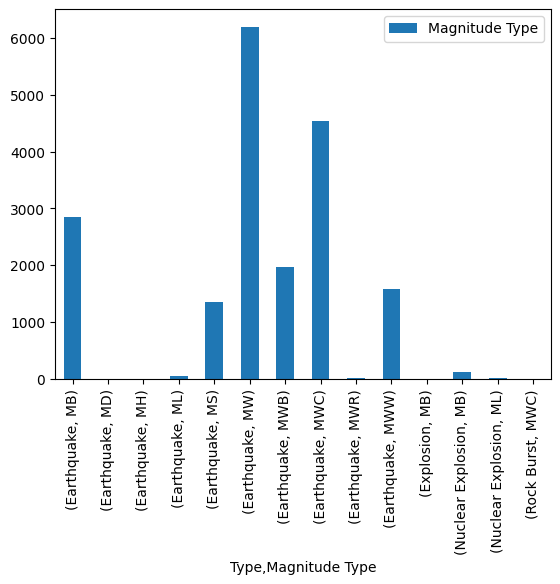

In [83]:
df_train.groupby(['Type', 'Magnitude Type'])[['Magnitude Type']].count().sort_values(['Type']).rename(columns={'Type':'Count'}).plot(kind='bar')

<Axes: xlabel='Type,Status'>

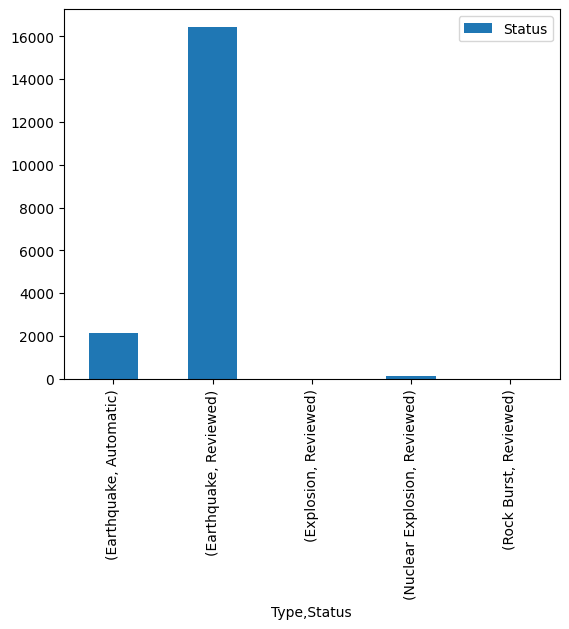

In [84]:
df_train.groupby(['Type', 'Status'])[['Status']].count().sort_values(['Type']).rename(columns={'Type':'Count'}).plot(kind='bar')

In [85]:
dict_labels = {}
for feature in categorical_features:
  if df_train[feature].nunique() > 2:
    x = df_train[feature].value_counts().keys().tolist()
    y = df_train[feature].value_counts().tolist()
    l_labels = []
    l_counts = []
    #print(feature, x, y)
    for i in y:
      if (i/len(df_train))*100 > 1:
        ind = y.index(i)
        #print(x[ind], y[ind])
        l_labels.append(x[ind])
        l_counts.append(i)
    dict_labels[feature] = [l_labels, l_counts] 

In [86]:
dict_labels

{'Type': [['Earthquake'], [18581]],
 'Magnitude Type': [['MW', 'MWC', 'MB', 'MWB', 'MWW', 'MS'],
  [6190, 4542, 2992, 1977, 1581, 1353]],
 'Location Source': [['US', 'ISCGEM'], [16242, 2091]]}

In [87]:
for feature in dict_labels.keys():
   for l in dict_labels[feature][0]:
    df_train[l] = np.where(df_train[feature] == l, 1, 0)

In [88]:
df_train.columns

Index(['Latitude', 'Longitude', 'Type', 'Depth', 'Depth Seismic Stations',
       'Magnitude Type', 'Azimuthal Gap', 'Root Mean Square',
       'Location Source', 'Status', 'Magnitude', 'Day', 'Month', 'Year',
       'Hours', 'Minutes', 'Seconds', 'Earthquake', 'MW', 'MWC', 'MB', 'MWB',
       'MWW', 'MS', 'US', 'ISCGEM'],
      dtype='object')

In [89]:
df_train = df_train.drop(['Type', 'Magnitude Type', 'Location Source'], axis=1)

In [90]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18727 entries, 0 to 18728
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Latitude                18727 non-null  float64
 1   Longitude               18727 non-null  float64
 2   Depth                   18727 non-null  float64
 3   Depth Seismic Stations  18727 non-null  float64
 4   Azimuthal Gap           18727 non-null  float64
 5   Root Mean Square        18727 non-null  float64
 6   Status                  18727 non-null  object 
 7   Magnitude               18727 non-null  float64
 8   Day                     18727 non-null  int64  
 9   Month                   18727 non-null  int64  
 10  Year                    18727 non-null  int64  
 11  Hours                   18727 non-null  int64  
 12  Minutes                 18727 non-null  int64  
 13  Seconds                 18727 non-null  int64  
 14  Earthquake              18727 non-null

In [91]:
df_train.shape

(18727, 23)

In [92]:
df_train.head(8)

,Latitude,Longitude,Depth,Depth Seismic Stations,Azimuthal Gap,Root Mean Square,Status,Magnitude,Day,Month,Year,Hours,Minutes,Seconds,Earthquake,MW,MWC,MB,MWB,MWW,MS,US,ISCGEM
0,14.9440,2.449288e-27,1.965832e+48,253.0,36.0,0.74,Reviewed,7.4,29,11,2007,19,0,20,1,0,0,0,1,0,0,1,0
1,-14.4380,1.019496e-33,2.648912e+10,253.0,36.0,1.00,Reviewed,6.9,28,10,2011,18,54,34,1,0,0,0,0,1,0,1,0
2,38.3400,7.384028e+08,3.269017e+06,253.0,36.0,1.00,Reviewed,5.7,25,3,2007,13,57,58,1,0,0,0,1,0,0,0,0
3,42.5250,9.590032e+62,2.635252e+12,253.0,36.0,0.80,Reviewed,5.5,6,5,2004,13,43,13,1,0,0,0,1,0,0,1,0
4,-15.8640,1.871765e-75,1.308628e+12,253.0,36.0,0.90,Reviewed,5.7,27,8,1988,16,30,17,1,1,0,0,0,0,0,1,0
5,-19.9262,1.793265e-31,2.766035e+01,253.0,36.0,1.20,Reviewed,5.8,18,3,2014,21,26,45,1,0,0,0,0,1,0,1,0
6,-24.0890,3.582776e-31,8.636984e+17,253.0,36.0,0.90,Reviewed,6.1,6,3,1987,7,6,44,1,1,0,0,0,0,0,1,0
7,8.1160,2.077046e-17,2.202647e+04,253.0,36.0,1.10,Reviewed,6.1,20,5,1988,14,58,44,1,1,0,0,0,0,0,1,0


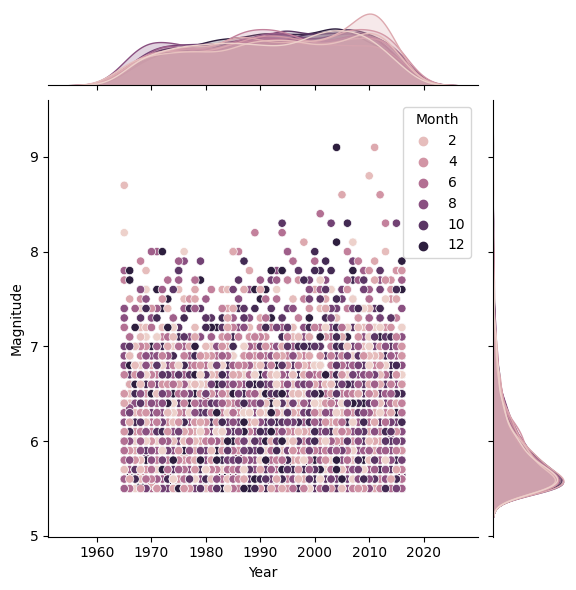

In [93]:
sns.jointplot(y='Magnitude', x='Year', data=df_train, hue='Month')

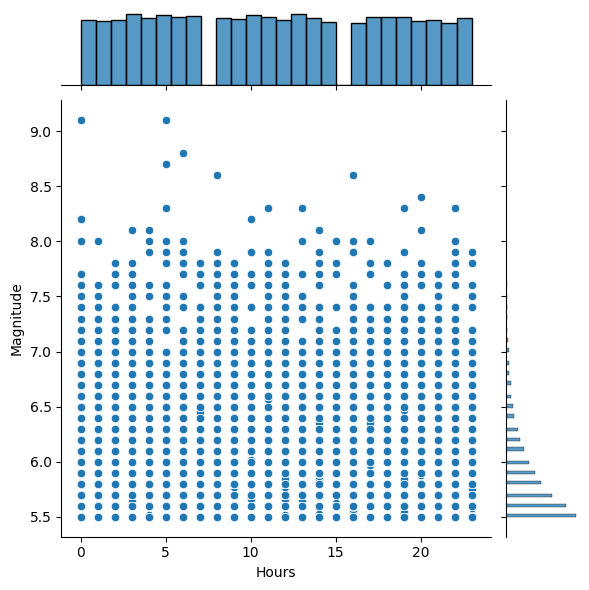

In [94]:
sns.jointplot(y='Magnitude', x='Hours', data=df_train)

In [95]:
df_train = df_train.drop(['Day', 'Month', 'Year', 'Hours', 'Minutes', 'Seconds'], axis = 1)

#### Encoding of categorical variables

In [96]:
df_train = pd.get_dummies(df_train, drop_first=True)

In [97]:
df_train.head()

,Latitude,Longitude,Depth,Depth Seismic Stations,Azimuthal Gap,Root Mean Square,Magnitude,Earthquake,MW,MWC,MB,MWB,MWW,MS,US,ISCGEM,Status_Reviewed
0,14.944,2.449288e-27,1.965832e+48,253.0,36.0,0.74,7.4,1,0,0,0,1,0,0,1,0,1
1,-14.438,1.019496e-33,2.648912e+10,253.0,36.0,1.00,6.9,1,0,0,0,0,1,0,1,0,1
2,38.340,7.384028e+08,3.269017e+06,253.0,36.0,1.00,5.7,1,0,0,0,1,0,0,0,0,1
3,42.525,9.590032e+62,2.635252e+12,253.0,36.0,0.80,5.5,1,0,0,0,1,0,0,1,0,1
4,-15.864,1.871765e-75,1.308628e+12,253.0,36.0,0.90,5.7,1,1,0,0,0,0,0,1,0,1


## Feature Scaling

In [98]:
from sklearn.preprocessing import StandardScaler

In [99]:
#Instantiating StandardScaler
sc = StandardScaler()

In [100]:
X_train = df_train.iloc[:, df_train.columns != 'Magnitude']

In [101]:
Y = df_train.loc[:, 'Magnitude']

In [102]:
#Fitting the dataframe X_train onto the standard scaler
df_train_continuous_features_transformed = sc.fit_transform(X_train)

In [103]:
df_train_continuous_features_transformed

array([[ 0.43664307, -0.10984676,  2.47649369, ...,  0.3911501 ,
        -0.35452965,  0.35928369],
       [-0.53691872, -0.10984676, -0.40677112, ...,  0.3911501 ,
        -0.35452965,  0.35928369],
       [ 1.21186095, -0.10984676, -0.40677112, ..., -2.55656334,
        -0.35452965,  0.35928369],
       ...,
       [-0.28539372, -0.10984676,  2.47649369, ...,  0.3911501 ,
        -0.35452965,  0.35928369],
       [-0.23973419, -0.10984676, -0.40677112, ..., -2.55656334,
         2.82063856, -2.78331588],
       [-2.06836833, -0.10984676, -0.40677112, ...,  0.3911501 ,
        -0.35452965,  0.35928369]])

In [104]:
X = pd.DataFrame(df_train_continuous_features_transformed, columns=X_train.columns)

In [105]:
X.head()

,Latitude,Longitude,Depth,Depth Seismic Stations,Azimuthal Gap,Root Mean Square,Earthquake,MW,MWC,MB,MWB,MWW,MS,US,ISCGEM,Status_Reviewed
0,0.436643,-0.109847,2.476494,0.0,0.0,-1.948296,0.088642,-0.702665,-0.56586,-0.436061,2.910744,-0.303658,-0.279061,0.391150,-0.35453,0.359284
1,-0.536919,-0.109847,-0.406771,0.0,0.0,-0.117552,0.088642,-0.702665,-0.56586,-0.436061,-0.343555,3.293180,-0.279061,0.391150,-0.35453,0.359284
2,1.211861,-0.109847,-0.406771,0.0,0.0,-0.117552,0.088642,-0.702665,-0.56586,-0.436061,2.910744,-0.303658,-0.279061,-2.556563,-0.35453,0.359284
3,1.350529,-0.109847,-0.406771,0.0,0.0,-1.525816,0.088642,-0.702665,-0.56586,-0.436061,2.910744,-0.303658,-0.279061,0.391150,-0.35453,0.359284
4,-0.584169,-0.109847,-0.406771,0.0,0.0,-0.821684,0.088642,1.423153,-0.56586,-0.436061,-0.343555,-0.303658,-0.279061,0.391150,-0.35453,0.359284


In [106]:
Y.head()

0    7.4
1    6.9
2    5.7
3    5.5
4    5.7
Name: Magnitude, dtype: float64

#### Feature Selection

In [107]:
from sklearn.ensemble import ExtraTreesRegressor

In [108]:
model = ExtraTreesRegressor()

In [109]:
model.fit(X,Y)

ExtraTreesRegressor()

In [110]:
feat_importances = pd.Series(model.feature_importances_, index = X.columns).sort_values(ascending = False)

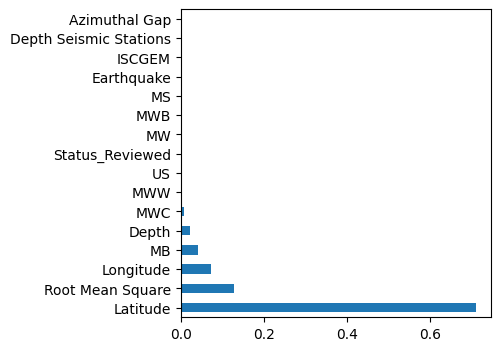

In [111]:
plt.figure(figsize=(4,4))
feat_importances.plot(kind='barh')
plt.show()

In [112]:
from sklearn.feature_selection import VarianceThreshold

In [113]:
var_thres = VarianceThreshold(threshold=0)

In [114]:
X_train_variance, X_test_variance, y_train_variance, y_test_variance = train_test_split(X, Y, test_size = 0.15, random_state = 42, shuffle=True)

In [115]:
var_thres.fit(X_train_variance)

VarianceThreshold(threshold=0)

In [116]:
sum(var_thres.get_support())

14

In [117]:
var_thres.get_support()

array([ True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [118]:
constant_columns = [column for column in X_train.columns if column not in X_train.columns[var_thres.get_support()]]

In [119]:
print(constant_columns)

['Depth Seismic Stations', 'Azimuthal Gap']


In [120]:
X_train.columns

Index(['Latitude', 'Longitude', 'Depth', 'Depth Seismic Stations',
       'Azimuthal Gap', 'Root Mean Square', 'Earthquake', 'MW', 'MWC', 'MB',
       'MWB', 'MWW', 'MS', 'US', 'ISCGEM', 'Status_Reviewed'],
      dtype='object')

In [121]:
X = X.drop(['Depth Seismic Stations', 'Azimuthal Gap'], axis = 1)

In [122]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

In [123]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))

In [124]:
feature_sel_model.fit(X, Y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [125]:
feature_sel_model.get_support()

array([ True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True, False])

In [126]:
selected_feat = X.columns[(feature_sel_model.get_support())]

In [127]:
selected_feat

Index(['Latitude', 'Depth', 'Root Mean Square', 'Earthquake', 'MWC', 'MB',
       'MWB', 'MWW', 'MS', 'ISCGEM'],
      dtype='object')

In [128]:
X.columns

Index(['Latitude', 'Longitude', 'Depth', 'Root Mean Square', 'Earthquake',
       'MW', 'MWC', 'MB', 'MWB', 'MWW', 'MS', 'US', 'ISCGEM',
       'Status_Reviewed'],
      dtype='object')

In [129]:
X = X.drop(['ISCGEM'], axis = 1)

In [130]:
X = X.drop(['Status_Reviewed'], axis = 1)

In [131]:
X = X.drop(['MW'], axis = 1)

In [132]:
X = X.drop(['US'], axis = 1)

In [133]:
df_train = X.join(Y, how='inner')

In [134]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18725 entries, 0 to 18726
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Latitude          18725 non-null  float64
 1   Longitude         18725 non-null  float64
 2   Depth             18725 non-null  float64
 3   Root Mean Square  18725 non-null  float64
 4   Earthquake        18725 non-null  float64
 5   MWC               18725 non-null  float64
 6   MB                18725 non-null  float64
 7   MWB               18725 non-null  float64
 8   MWW               18725 non-null  float64
 9   MS                18725 non-null  float64
 10  Magnitude         18725 non-null  float64
dtypes: float64(11)
memory usage: 1.7 MB


Data Preprocessing of the test data

In [135]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4683 entries, 0 to 4682
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        4683 non-null   object 
 1   Time                        4683 non-null   object 
 2   Latitude                    4683 non-null   float64
 3   Longitude                   4683 non-null   float64
 4   Type                        4683 non-null   object 
 5   Depth                       4683 non-null   float64
 6   Depth Error                 885 non-null    float64
 7   Depth Seismic Stations      1435 non-null   float64
 8   Magnitude Type              4682 non-null   object 
 9   Magnitude Error             56 non-null     float64
 10  Magnitude Seismic Stations  495 non-null    float64
 11  Azimuthal Gap               1443 non-null   float64
 12  Horizontal Distance         302 non-null    float64
 13  Horizontal Error            213 n

In [136]:
df_test.isnull().sum()

Date                             0
Time                             0
Latitude                         0
Longitude                        0
Type                             0
Depth                            0
Depth Error                   3798
Depth Seismic Stations        3248
Magnitude Type                   1
Magnitude Error               4627
Magnitude Seismic Stations    4188
Azimuthal Gap                 3240
Horizontal Distance           4381
Horizontal Error              4470
Root Mean Square              1212
ID                               0
Source                           0
Location Source                  0
Magnitude Source                 0
Status                           0
Magnitude                        0
dtype: int64

In [137]:
(df_test.isnull().sum()/len(df_test))

Date                          0.000000
Time                          0.000000
Latitude                      0.000000
Longitude                     0.000000
Type                          0.000000
Depth                         0.000000
Depth Error                   0.811019
Depth Seismic Stations        0.693572
Magnitude Type                0.000214
Magnitude Error               0.988042
Magnitude Seismic Stations    0.894299
Azimuthal Gap                 0.691864
Horizontal Distance           0.935511
Horizontal Error              0.954516
Root Mean Square              0.258808
ID                            0.000000
Source                        0.000000
Location Source               0.000000
Magnitude Source              0.000000
Status                        0.000000
Magnitude                     0.000000
dtype: float64

In [138]:
for feature in df_test.columns:
  if (df_test[feature].isnull().sum()/len(df_test))*100 > 80:
    df_test = df_test.drop([feature], axis=1)
  elif (df_test[feature].isnull().sum()/len(df_test))*100 <= 1:
    df_test = df_test.dropna(subset=[feature])

In [139]:
df_test['Depth Seismic Stations'] = df_test['Depth Seismic Stations'].fillna(df_test['Depth Seismic Stations'].median())

In [140]:
df_test['Azimuthal Gap'] = df_test['Azimuthal Gap'].fillna(df_test['Azimuthal Gap'].median())

In [141]:
df_test['Root Mean Square'] = df_test['Root Mean Square'].fillna(df_test['Root Mean Square'].median())

In [142]:
(df_test.isnull().sum()/len(df_test))

Date                      0.0
Time                      0.0
Latitude                  0.0
Longitude                 0.0
Type                      0.0
Depth                     0.0
Depth Seismic Stations    0.0
Magnitude Type            0.0
Azimuthal Gap             0.0
Root Mean Square          0.0
ID                        0.0
Source                    0.0
Location Source           0.0
Magnitude Source          0.0
Status                    0.0
Magnitude                 0.0
dtype: float64

In [143]:
df_test = df_test.drop(['ID'], axis = 1)

In [144]:
remove_outliers(df_test, continuous_features)

In [145]:
skewness_score(df_test, continuous_features)

,Feature,Skewness Score before transformation,Skewness score after exponential transformation of skewed features
0,Latitude,0.136978,Not transformed
1,Longitude,-0.611178,10.412144
2,Depth,1.064511,2.020013
3,Depth Seismic Stations,NaN,Not transformed
4,Azimuthal Gap,NaN,Not transformed
5,Root Mean Square,0.261678,Not transformed


In [146]:
df_test = df_test.drop(['Date', 'Time'], axis = 1)

In [147]:
categorical_features = [feature for feature in df_test.select_dtypes(np.object).columns]

In [148]:
categorical_features

['Type',
 'Magnitude Type',
 'Source',
 'Location Source',
 'Magnitude Source',
 'Status']

In [149]:
df_test[categorical_features].nunique()

Type                 2
Magnitude Type       9
Source              10
Location Source     32
Magnitude Source    15
Status               2
dtype: int64

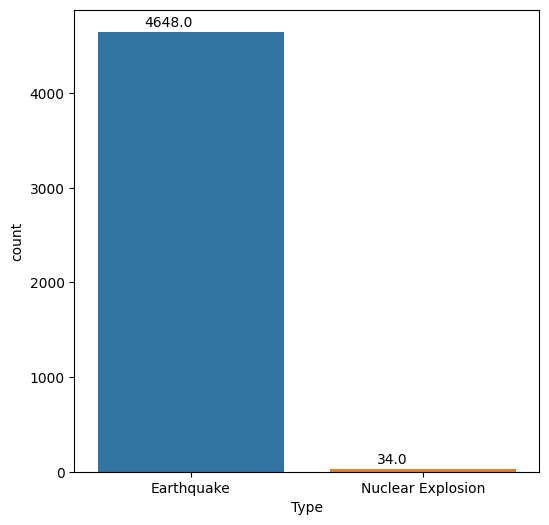

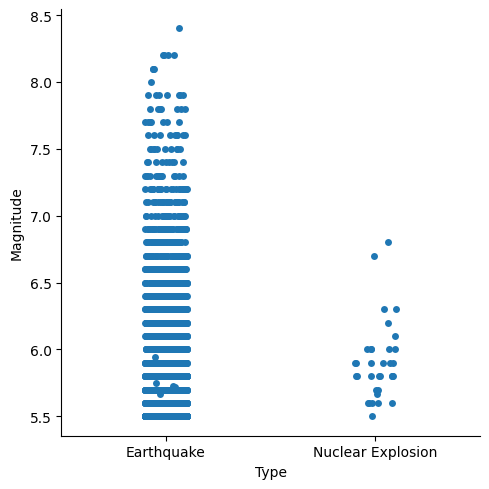

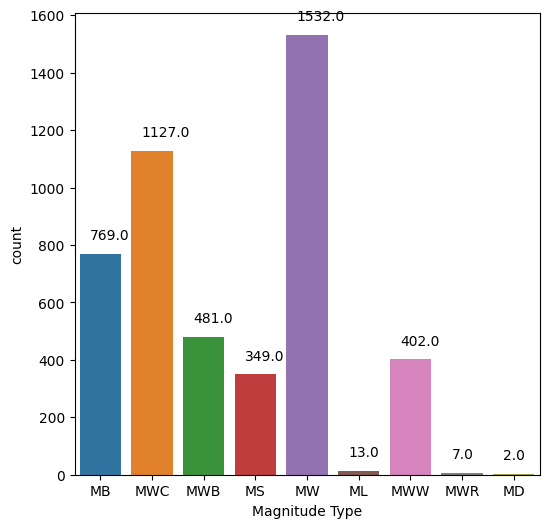

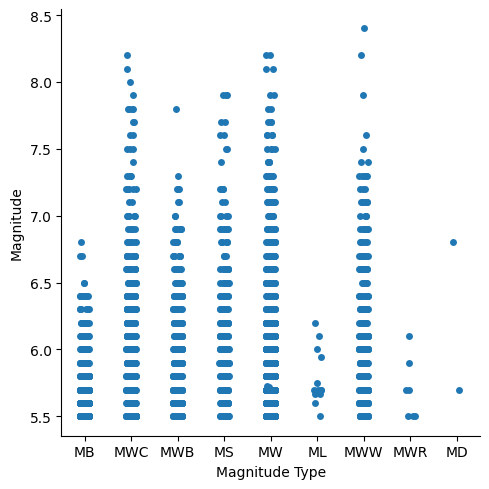

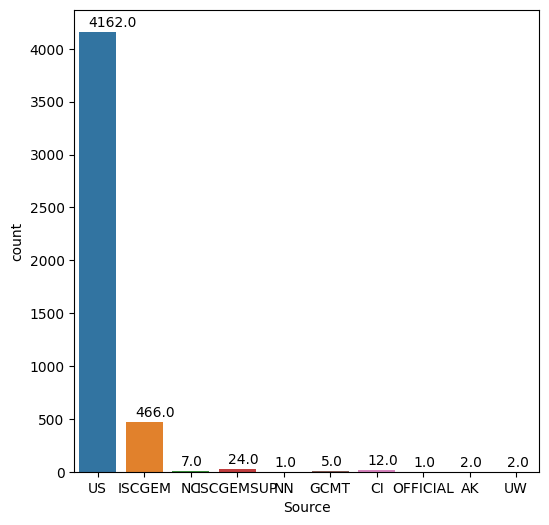

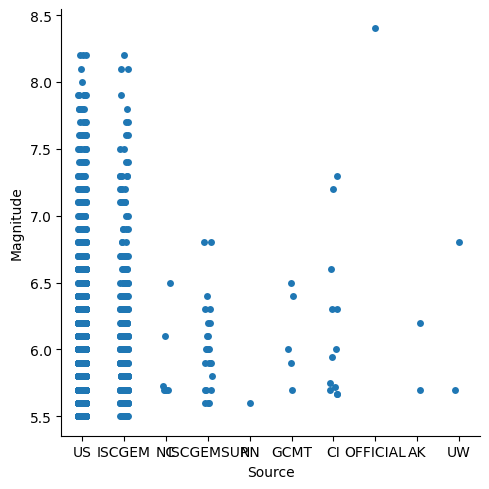

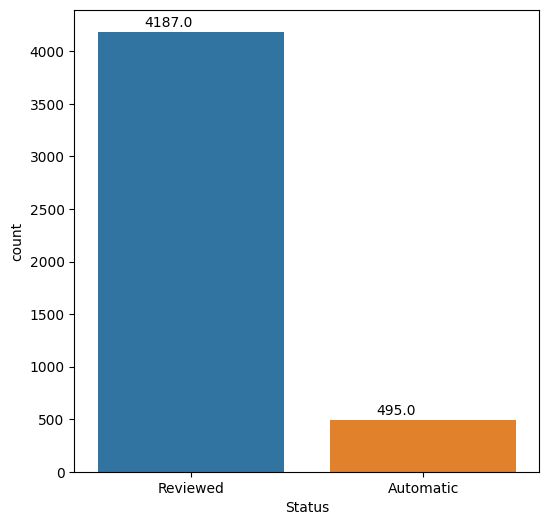

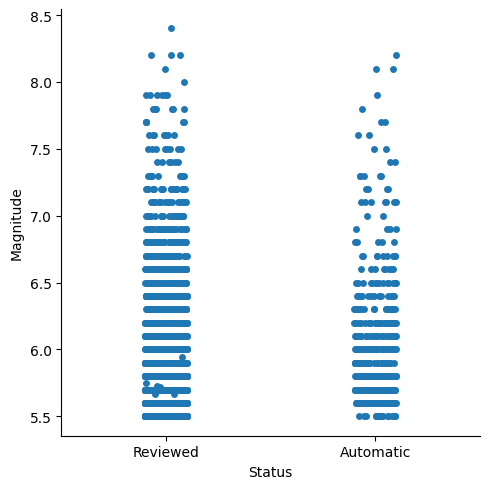

In [150]:
for feature in categorical_features:
    #print('Unique categories in the feature', feature, ': ', df_train[feature].nunique(), 'labels')
    if df_test[feature].nunique() <= 12:
      #print(df_train[feature].value_counts())
      plt.figure(figsize=(6,6))
      ax = sns.countplot(x=feature, data=df_test)
      for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+50))
      sns.catplot(x=feature, y='Magnitude', data=df_test)
      plt.show()

In [151]:
df_test = df_test.drop(['Source', 'Magnitude Source'], axis=1)

In [152]:
categorical_features.remove('Source')

In [153]:
categorical_features.remove('Magnitude Source')

In [154]:
categorical_features

['Type', 'Magnitude Type', 'Location Source', 'Status']

In [155]:
dict_labels = {}
for feature in categorical_features:
  if df_test[feature].nunique() > 2 or feature == 'Type':
    x = df_test[feature].value_counts().keys().tolist()
    y = df_test[feature].value_counts().tolist()
    l_labels = []
    l_counts = []
    #print(feature, x, y)
    for i in y:
      if (i/len(df_train))*100 > 1:
        ind = y.index(i)
        #print(x[ind], y[ind])
        l_labels.append(x[ind])
        l_counts.append(i)
    dict_labels[feature] = [l_labels, l_counts] 

In [156]:
dict_labels

{'Type': [['Earthquake'], [4648]],
 'Magnitude Type': [['MW', 'MWC', 'MB', 'MWB', 'MWW', 'MS'],
  [1532, 1127, 769, 481, 402, 349]],
 'Location Source': [['US', 'ISCGEM'], [4108, 490]]}

In [157]:
for feature in dict_labels.keys():
  print(feature)

Type
Magnitude Type
Location Source


In [158]:
for feature in dict_labels.keys():
  for l in dict_labels[feature][0]:
    df_test[l] = np.where(df_test[feature] == l, 1, 0)

In [159]:
df_test.columns

Index(['Latitude', 'Longitude', 'Type', 'Depth', 'Depth Seismic Stations',
       'Magnitude Type', 'Azimuthal Gap', 'Root Mean Square',
       'Location Source', 'Status', 'Magnitude', 'Earthquake', 'MW', 'MWC',
       'MB', 'MWB', 'MWW', 'MS', 'US', 'ISCGEM'],
      dtype='object')

In [160]:
df_test = df_test.drop(['Type', 'Magnitude Type', 'Location Source'], axis=1)

In [161]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4682 entries, 0 to 4682
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Latitude                4682 non-null   float64
 1   Longitude               4682 non-null   float64
 2   Depth                   4682 non-null   float64
 3   Depth Seismic Stations  4682 non-null   float64
 4   Azimuthal Gap           4682 non-null   float64
 5   Root Mean Square        4682 non-null   float64
 6   Status                  4682 non-null   object 
 7   Magnitude               4682 non-null   float64
 8   Earthquake              4682 non-null   int64  
 9   MW                      4682 non-null   int64  
 10  MWC                     4682 non-null   int64  
 11  MB                      4682 non-null   int64  
 12  MWB                     4682 non-null   int64  
 13  MWW                     4682 non-null   int64  
 14  MS                      4682 non-null   

In [162]:
df_test = pd.get_dummies(df_test, drop_first=True)

In [163]:
df_train.head()

,Latitude,Longitude,Depth,Root Mean Square,Earthquake,MWC,MB,MWB,MWW,MS,Magnitude
0,0.436643,-0.109847,2.476494,-1.948296,0.088642,-0.56586,-0.436061,2.910744,-0.303658,-0.279061,7.4
1,-0.536919,-0.109847,-0.406771,-0.117552,0.088642,-0.56586,-0.436061,-0.343555,3.293180,-0.279061,6.9
2,1.211861,-0.109847,-0.406771,-0.117552,0.088642,-0.56586,-0.436061,2.910744,-0.303658,-0.279061,5.7
3,1.350529,-0.109847,-0.406771,-1.525816,0.088642,-0.56586,-0.436061,2.910744,-0.303658,-0.279061,5.5
4,-0.584169,-0.109847,-0.406771,-0.821684,0.088642,-0.56586,-0.436061,-0.343555,-0.303658,-0.279061,5.7


In [164]:
X_test = df_test.iloc[:, df_test.columns != 'Magnitude']

In [165]:
Y = df_test.loc[:, 'Magnitude']

In [166]:
#Fitting the dataframe X_train onto the standard scaler
df_test_continuous_features_transformed = sc.transform(X_test)

In [167]:
df_test_continuous_features_transformed

array([[ 4.63833627e-02, -1.09846762e-01,  1.39941435e+04, ...,
         3.91150098e-01, -3.54529649e-01,  3.59283691e-01],
       [ 1.38876675e+00, -1.09846762e-01, -4.06771120e-01, ...,
         3.91150098e-01, -3.54529649e-01,  3.59283691e-01],
       [-2.06811347e-02, -1.09846762e-01, -4.06771120e-01, ...,
         3.91150098e-01, -3.54529649e-01,  3.59283691e-01],
       ...,
       [ 1.14774543e+00, -1.09846762e-01,  1.39941435e+04, ...,
        -2.55656334e+00,  2.82063856e+00, -2.78331588e+00],
       [-7.85925486e-01, -2.10845643e-02, -4.06771120e-01, ...,
         3.91150098e-01, -3.54529649e-01,  3.59283691e-01],
       [-1.07701324e+00, -1.09846762e-01, -4.06771120e-01, ...,
         3.91150098e-01, -3.54529649e-01,  3.59283691e-01]])

In [168]:
X = pd.DataFrame(df_test_continuous_features_transformed, columns=X_test.columns)

In [169]:
X.head()

,Latitude,Longitude,Depth,Depth Seismic Stations,Azimuthal Gap,Root Mean Square,Earthquake,MW,MWC,MB,MWB,MWW,MS,US,ISCGEM,Status_Reviewed
0,0.046383,-0.109847,13994.143513,10.0,-1.0,-0.117552,0.088642,-0.702665,-0.565860,2.293256,-0.343555,-0.303658,-0.279061,0.39115,-0.35453,0.359284
1,1.388767,-0.109847,-0.406771,10.0,-1.0,-1.244164,0.088642,-0.702665,1.767222,-0.436061,-0.343555,-0.303658,-0.279061,0.39115,-0.35453,0.359284
2,-0.020681,-0.109847,-0.406771,10.0,-1.0,-0.962511,0.088642,-0.702665,-0.565860,-0.436061,2.910744,-0.303658,-0.279061,0.39115,-0.35453,0.359284
3,1.222100,-0.109847,13994.143513,10.0,-1.0,0.234514,0.088642,-0.702665,1.767222,-0.436061,-0.343555,-0.303658,-0.279061,0.39115,-0.35453,0.359284
4,1.215738,-0.109847,-0.406771,10.0,-1.0,1.572365,0.088642,-0.702665,1.767222,-0.436061,-0.343555,-0.303658,-0.279061,0.39115,-0.35453,0.359284


In [170]:
Y.head()

0    5.6
1    5.5
2    5.5
3    5.8
4    6.0
Name: Magnitude, dtype: float64

In [171]:
X = X.drop(['Depth Seismic Stations', 'Azimuthal Gap'], axis = 1)

In [172]:
X = X.drop(['ISCGEM'], axis = 1)

In [173]:
X = X.drop(['Status_Reviewed'], axis = 1)

In [174]:
X = X.drop(['MW'], axis = 1)

In [175]:
X = X.drop(['US'], axis = 1)

In [176]:
df_test = X.join(Y, how='inner')

In [177]:
df_test.head()

,Latitude,Longitude,Depth,Root Mean Square,Earthquake,MWC,MB,MWB,MWW,MS,Magnitude
0,0.046383,-0.109847,13994.143513,-0.117552,0.088642,-0.565860,2.293256,-0.343555,-0.303658,-0.279061,5.6
1,1.388767,-0.109847,-0.406771,-1.244164,0.088642,1.767222,-0.436061,-0.343555,-0.303658,-0.279061,5.5
2,-0.020681,-0.109847,-0.406771,-0.962511,0.088642,-0.565860,-0.436061,2.910744,-0.303658,-0.279061,5.5
3,1.222100,-0.109847,13994.143513,0.234514,0.088642,1.767222,-0.436061,-0.343555,-0.303658,-0.279061,5.8
4,1.215738,-0.109847,-0.406771,1.572365,0.088642,1.767222,-0.436061,-0.343555,-0.303658,-0.279061,6.0


In [178]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4681 entries, 0 to 4681
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Latitude          4681 non-null   float64
 1   Longitude         4681 non-null   float64
 2   Depth             4681 non-null   float64
 3   Root Mean Square  4681 non-null   float64
 4   Earthquake        4681 non-null   float64
 5   MWC               4681 non-null   float64
 6   MB                4681 non-null   float64
 7   MWB               4681 non-null   float64
 8   MWW               4681 non-null   float64
 9   MS                4681 non-null   float64
 10  Magnitude         4681 non-null   float64
dtypes: float64(11)
memory usage: 438.8 KB


#### Model Building

*We will create a Linear Regression model*

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regressor = LinearRegression()

In [ ]:
#Fitting the training data on the Linear Regression model
regressor.fit(df_train_continuous_features_scaled, Y_train)

In [ ]:
#Intercept of the best fit line of regression
print("Intercept : ", regressor.intercept_)

In [ ]:
regressor.coef_

In [ ]:
y_pred = regressor.predict(df_test_continuous_features_scaled)

In [ ]:
from sklearn import metrics

In [ ]:
print("Mean absolute error : ", metrics.mean_absolute_error(Y, y_pred))
print("Mean squared error : ", metrics.mean_squared_error(Y, y_pred))
print("Root mean squared error : ", np.sqrt(metrics.mean_squared_error(Y, y_pred)))
print("R squared error : ", metrics.mean_squared_error(Y, y_pred))

In [ ]:
sns.distplot(Y-y_pred)

The distplot of the difference the y_test and y_pred is almost a Gaussian distribution

*Now we will build RandomForestRegressor model*

In [ ]:
from sklearn.ensemble import RandomForestRegressor

We will perform hyperparameter tuning for Random Forest Regressor model

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

In [ ]:
#Number of features to consider at every split
max_features = ['auto', 'sqrt']
#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start = 5, stop = 30, num = 6)]
#Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

random_grid

In [ ]:
rfc = RandomForestRegressor()
rsc = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter = 10, cv = 5, random_state = 42, verbose = 2, n_jobs=1)

In [ ]:
rsc.fit(X_train, y_train)

In [ ]:
prediction = rsc.predict(X_test)
prediction

In [ ]:
y_test

In [ ]:
rsc.best_params_

In [ ]:
plt.figure(figsize = (5,5))
sns.distplot(y_test-prediction)
plt.show()

In [ ]:
print("Mean absolute error : ", metrics.mean_absolute_error(y_test, prediction))
print("Mean squared error : ", metrics.mean_squared_error(y_test, prediction))
print("Root mean squared error : ", np.sqrt(metrics.mean_squared_error(y_test, prediction)))

In [ ]:
prediction[2109], y_test.tolist()[2109]

In [ ]:
prediction[1109], y_test.tolist()[1109]

In [ ]:
prediction[709], y_test.tolist()[709]